In [ ]:
!pip install -q sklearn


import pandas as pd
import numpy as np
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras


The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("X_train.shape", train_images.shape, "y_train.shape", train_labels.shape)
print("X_train.shape", test_images.shape, "y_train.shape", test_labels.shape)

X_train.shape (60000, 28, 28) y_train.shape (60000,)
X_train.shape (10000, 28, 28) y_train.shape (10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

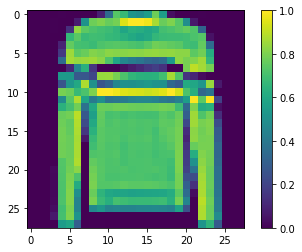

In [ ]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images=train_images/255
test_images=test_images/255

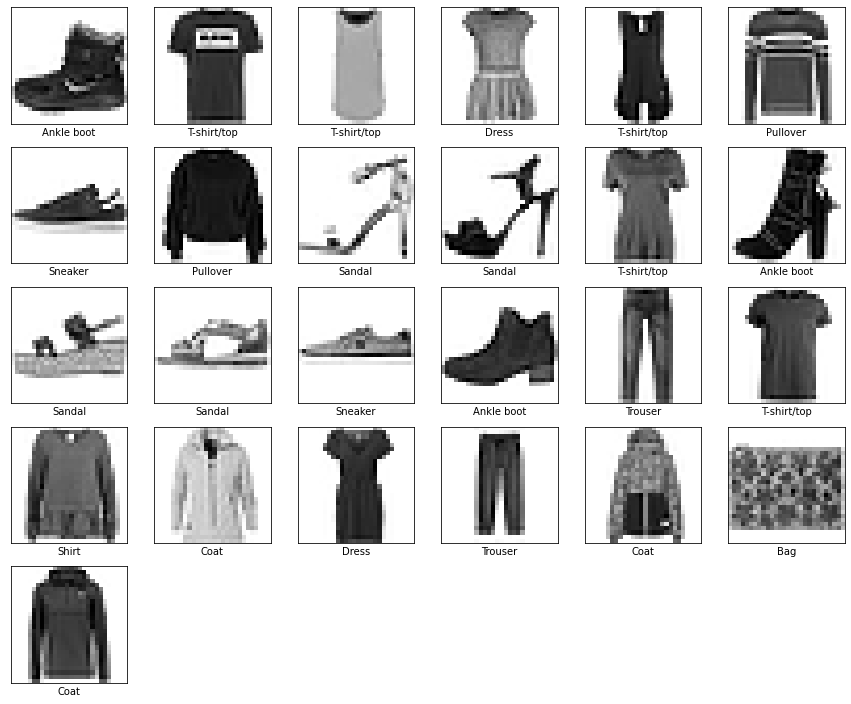

In [ ]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(6,6,i+1)
    plt.xticks([])# to remove scales
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#BUILD MODEL
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#loading
model.fit(train_images, train_labels, epochs=10)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2277 - accuracy: 0.9153
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2221 - accuracy: 0.9169
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2161 - accuracy: 0.9179
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2064 - accuracy: 0.9226
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2040 - accuracy: 0.9237
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1964 - accuracy: 0.9263
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1930 - accuracy: 0.9273
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1851 - accuracy: 0.9301
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1811 - accuracy: 0.9313
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.179

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4131 - accuracy: 0.8905 - 614ms/epoch - 2ms/step

Test accuracy: 0.890500009059906


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[2]
np.argmax(predictions[2])

1

In [ ]:
print(test_labels[2])

1


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

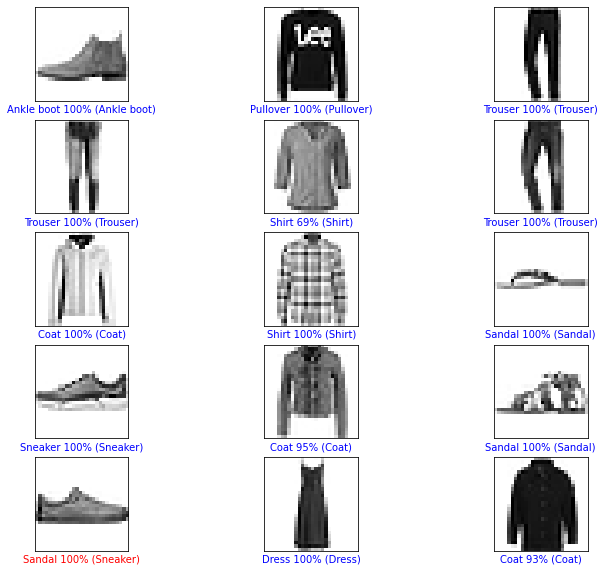

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
